# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [9]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import patsy 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

#import statsmodels.formula.api as smf

%matplotlib inline 

In [10]:
df = pd.read_csv('previsao_de_renda.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [12]:
df = df.dropna()
df.drop(columns=['Unnamed: 0','data_ref','index'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12466 non-null  object 
 1   posse_de_veiculo       12466 non-null  bool   
 2   posse_de_imovel        12466 non-null  bool   
 3   qtd_filhos             12466 non-null  int64  
 4   tipo_renda             12466 non-null  object 
 5   educacao               12466 non-null  object 
 6   estado_civil           12466 non-null  object 
 7   tipo_residencia        12466 non-null  object 
 8   idade                  12466 non-null  int64  
 9   tempo_emprego          12466 non-null  float64
 10  qt_pessoas_residencia  12466 non-null  float64
 11  mau                    12466 non-null  bool   
 12  renda                  12466 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

### 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [13]:
#separação em teste e treino
y= df['renda']
x = df.drop('renda',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.25, random_state=100)
#clf = clf.fit(x_train[['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']],y_train)


In [14]:
df_train = x_train
df_train['renda']=y_train
df_train


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
7879,F,True,True,0,Assalariado,Secundário,Casado,Casa,50,6.715068,2.0,False,3984.86
2632,F,False,True,0,Empresário,Secundário,Casado,Casa,51,6.630137,2.0,False,4196.93
3971,F,False,True,0,Assalariado,Superior completo,Casado,Casa,40,8.123288,2.0,False,2584.87
7140,M,True,True,0,Empresário,Secundário,Casado,Casa,42,3.257534,2.0,False,3294.94
2972,F,False,True,0,Empresário,Secundário,Viúvo,Casa,54,4.008219,1.0,False,1969.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,F,False,False,0,Assalariado,Secundário,União,Casa,41,13.194521,2.0,False,3420.80
14585,F,True,False,0,Empresário,Secundário,Casado,Casa,28,0.682192,2.0,False,2058.74
9712,F,False,False,0,Empresário,Superior completo,Casado,Casa,30,7.432877,2.0,True,2817.58
8392,M,True,True,0,Empresário,Superior completo,Solteiro,Casa,25,4.035616,1.0,False,2944.05


In [15]:
y, x = patsy.dmatrices('np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + mau', df_train)

### 2.Rode uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o  𝑅2  na base de testes. Qual o melhor modelo?

In [16]:
#Regressão
#no treinamento nos foi mostrado que quando colocamos zero em L1_wt no método elastic_net estariamos rodando pelo método Ridge
#o fato é que quando coloco 0 obtenho o erro descriminado abaixo, desta forma configurei o L1_wt = 0.000000000000001 (quase todo
#o peso no modelo Ridge e funcionou perfeitamente. Podem me explicar porque?
modelo = sm.OLS(y, x).fit_regularized(method= 'elastic_net',L1_wt = 0, refit = True,  alpha = 0)
modelo.summary()

NotImplementedError: 

In [17]:
alphas_aux = [0, 0.001, 0.005, 0.01, 0.05, 0.1] 

In [18]:
for alpha_aux in alphas_aux :
    print(f'Regressão Ridge para alpha = {alpha_aux}')
    modelo = sm.OLS(y, x).fit_regularized(method= 'elastic_net',L1_wt = 0.000000000000001, refit = True,  alpha = alpha_aux)
    print(modelo.summary())
    print('\n')
    print('\n')

Regressão Ridge para alpha = 0
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:40:04   Log-Likelihood:                -9880.6
No. Observations:                9349   AIC:                         1.982e+04
Df Residuals:                    9323   BIC:                         2.001e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Todos os modelos apresentaram o mesmo R2. Não consigo definir um modelo melhor só alterando o parâmetro alpha.

### 3.Faça o mesmo que no passo 2, com uma regressão LASSO. Qual método chega a um melhor resultado?

In [19]:
for alpha_aux in alphas_aux :
    print(f'Regressão Lasso para alpha = {alpha_aux}')
    modelo = sm.OLS(y, x).fit_regularized(method= 'elastic_net',L1_wt = 1, refit = True,  alpha = alpha_aux)
    print(modelo.summary())
    print('\n')
    print('\n')

Regressão Lasso para alpha = 0
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:40:06   Log-Likelihood:                -9880.6
No. Observations:                9349   AIC:                         1.982e+04
Df Residuals:                    9323   BIC:                         2.001e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Aparentemente no modelo Lasso conforme vamos aumentando o alpha, o R2 vai diminuindo. Desta forma, o melhor modelo foi o alpha igual a zero considerando o R2. Notei também que o modelo zerou alguns parâmetros, possívelmente porque eles não são significantes para o modelo. Se considerarmos o R2 ajustado e o AIC que considera a simplificação do modelo poderiamos escolher outros modelos que tem um R2 ajustado ligeiramente menor que o do modelo com alpha igual a zero mas bem mais simplificado, como por exemplo o modelo com alpha igual a 0.005 ou 0.01.

### 4.Rode um modelo stepwise. Avalie o  𝑅2  na Base de testes. Qual o melhor resultado?

In [20]:
#criando dummies
df_dummies = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel','tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia','mau'])
df_dummies.head(5)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_False,posse_de_veiculo_True,posse_de_imovel_False,...,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,mau_False,mau_True
0,1,36,3.575342,3.0,3369.24,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,42,0.860274,2.0,6096.14,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,31,8.065753,4.0,5658.98,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,50,1.208219,2.0,7246.69,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
4,0,52,13.873973,2.0,4017.37,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [21]:
#Separando Variáveiss 
y= df_dummies['renda']
x = df_dummies.drop('renda',axis=1)

In [22]:
#Criando Base de Treino e Teste
x_train_dummies, x_test_dummies, y_train_dummies, y_test_dummies = train_test_split(x, y , test_size=0.25, random_state=100)

In [23]:
#Verificação
print(x_train_dummies.shape)
print(x_test_dummies.shape)

(9349, 33)
(3117, 33)


In [24]:
#eliminando colunas dos dummies que não serão utilizadas no modelo e organizando o dataframe
x_train_dummies.drop(columns=['sexo_F', 'posse_de_veiculo_False','posse_de_imovel_False','tipo_renda_Assalariado'
                               , 'educacao_Primário','estado_civil_Casado', 'tipo_residencia_Aluguel','mau_False'], inplace=True)
x_train_dummies= x_train_dummies[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'
                           ,'sexo_M', 'posse_de_veiculo_True', 'posse_de_imovel_True'
                           ,'tipo_renda_Bolsista', 'tipo_renda_Empresário'
                           ,'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior completo', 'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True']]

In [25]:
#separando em variávies e targets.
X = x_train_dummies
y = y_train_dummies
print(X.shape)
print(y.shape)

(9349, 25)
(9349,)


In [26]:
####Executando o modelo proposto de stepwise
def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        #print("included")
        #print(included)
       
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                print("modelo 1")
                print(model.summary())
                new_pval[new_column] = model.pvalues[new_column]
                print("new_pval")
                print(new_pval)
                
            best_pval = new_pval.min()
            print("best_pval")
            print(best_pval)      
            if best_pval < threshold_in:
                print("best_pval")
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print("Entrou")
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
              
            
            #sys.exit()
            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            print("modelo 2")
            print(model.summary())
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            print("worst_pval")
            print(worst_pval) 
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


C:\Users\br0hg\AppData\Local\Temp\ipykernel_17960\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.52
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.67e-07
Time:                        14:40:12   Log-Likelihood:                -92686.
No. Observations:                9349   AIC:                         1.854e+05
Df Residuals:                    9347   BIC:                         1.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const      

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17960\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     972.2
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:40:12   Log-Likelihood:                -91816.
No. Observations:                9349   AIC:                         1.836e+05
Df Residuals:                    9346   BIC:                         1.837e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17960\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     842.5
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:40:12   Log-Likelihood:                -91580.
No. Observations:                9349   AIC:                         1.832e+05
Df Residuals:                    9345   BIC:                         1.832e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17960\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     661.8
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:40:12   Log-Likelihood:                -91533.
No. Observations:                9349   AIC:                         1.831e+05
Df Residuals:                    9344   BIC:                         1.831e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1246.08

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17960\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


estado_civil_Separado            7.126657e-01
idade                            1.097874e-08
educacao_Pós graduação           1.476221e-02
posse_de_imovel_True             1.432309e-06
estado_civil_Viúvo               7.061750e-01
estado_civil_Solteiro            5.777573e-01
mau_True                                  NaN
tipo_residencia_Comunitário               NaN
estado_civil_União                        NaN
tipo_residencia_Casa                      NaN
educacao_Secundário                       NaN
tipo_residencia_Estúdio                   NaN
qtd_filhos                                NaN
posse_de_veiculo_True                     NaN
tipo_residencia_Com os pais               NaN
educacao_Superior incompleto              NaN
tipo_renda_Pensionista                    NaN
tipo_residencia_Governamental             NaN
tipo_renda_Bolsista                       NaN
tipo_renda_Servidor público               NaN
qt_pessoas_residencia                     NaN
dtype: float64
modelo 1
          

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17960\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     457.3
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:40:13   Log-Likelihood:                -91495.
No. Observations:                9349   AIC:                         1.830e+05
Df Residuals:                    9342   BIC:                         1.831e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const      

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17960\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     396.4
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        14:40:13   Log-Likelihood:                -91483.
No. Observations:                9349   AIC:                         1.830e+05
Df Residuals:                    9341   BIC:                         1.830e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const      

In [27]:
#criando dummies
#df_test_dummies = pd.get_dummies(df_test, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel','tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia','mau'])
#df_test_dummies.columns


In [28]:
#eliminando colunas dos dummies que não serão utilizadas no modelo e organizando o dataframe


x_test_dummies.drop(columns=['sexo_F', 'posse_de_veiculo_False','posse_de_imovel_False','tipo_renda_Assalariado'
                               , 'educacao_Primário','estado_civil_Casado', 'tipo_residencia_Aluguel','mau_False'], inplace=True)
x_test_dummies= x_test_dummies[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'
                           ,'sexo_M', 'posse_de_veiculo_True', 'posse_de_imovel_True'
                           ,'tipo_renda_Bolsista', 'tipo_renda_Empresário'
                           ,'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior completo', 'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True']]



In [29]:
#separando em variávies e targets.
#X_test = df_test_dummies.iloc[:, 0:25] 
y_test = y_test_dummies
X_test=x_test_dummies.drop(columns=['qtd_filhos', 'qt_pessoas_residencia'
                           ,'posse_de_veiculo_True' 
                           ,'tipo_renda_Bolsista' 
                           ,'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True'])

X_test.columns

Index(['idade', 'tempo_emprego', 'sexo_M', 'posse_de_imovel_True',
       'tipo_renda_Empresário', 'educacao_Superior completo'],
      dtype='object')

In [30]:
#model_test = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
model_test = sm.OLS(y_test,sm.add_constant(pd.DataFrame(X_test))).fit()   
model_test.summary()    
    


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     121.7
Date:                Tue, 24 May 2022   Prob (F-statistic):          1.57e-138
Time:                        14:40:14   Log-Likelihood:                -30514.
No. Observations:                3117   AIC:                         6.104e+04
Df Residuals:                    3110   BIC:                         6.108e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        101.7814    386.432      0.263      0.792    -655.906     859.468
idade                         28.3736      8.873      3.198      0.001      10.976      45.771
tempo_emprego                271.9096     12.143     22.391      0.000     248.100     295.720
sexo_M                      2329.4511    165.778     14.052      0.000    2004.405    2654.497
posse_de_imovel_True         392.9131    161.865      2.427      0.015      75.541     710.286
tipo_renda_Empresário        857.8517    175.688      4.883      0.000     513.375    1202.328
educacao_Superior completo   464.8783    161.396      2.880      0.004     148.425     781.332
==============================================================================
Omnibus:                     2769.812   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158603.780
Skew:                           3.982   Prob(JB):                         0.00
Kurtosis:                      37.026   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando-se o melhor modelo gerado pelo método stepwise, quando rodamos na base de teste obtemos um R2 pior do que com a base de treino. Ou seja, o R2 conseguido na base de treino é melhor do que na base de teste.

### 5.Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?



Comparando os parâmetros, o melhor modelo foi aquele composto pelos parâmetros tempo_emprego, sexo_M, tipo_renda_Empresário, educacao_Superior completo, idade, posse_de_imovel_True. Podemos observar um p-value abaixo de 0.05 em todos os parâmetrods.

### 6.Partindo dos modelos que você ajustou, tente melhorar o  𝑅2  na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [31]:
df_test_dummies = x_test_dummies
df_test_dummies ['renda']= y_test_dummies
df_test_dummies

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,mau_True,renda
11349,0,24,6.032877,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4283.18
12462,0,33,0.841096,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,926.67
377,0,47,8.967123,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1703.33
11232,0,45,7.832877,2.0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,4329.86
11526,0,50,4.219178,2.0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,911.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6824,0,53,7.884932,2.0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,5370.64
2896,2,27,4.923288,4.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3481.17
5764,0,39,8.052055,1.0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1988.20
5774,2,32,2.967123,4.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2161.41


In [32]:
#preparando arquivo
df_test_dummies_new = df_test_dummies.copy()
df_test_dummies.drop(columns=['qtd_filhos', 'qt_pessoas_residencia'
                           ,'posse_de_veiculo_True' 
                           ,'tipo_renda_Bolsista','tipo_renda_Pensionista' 
                           , 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True'], inplace=True)
df_test_dummies['renda'] = y_test
df_test_dummies

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Empresário,educacao_Superior completo,renda
11349,24,6.032877,1,0,0,0,4283.18
12462,33,0.841096,1,0,0,0,926.67
377,47,8.967123,0,0,0,0,1703.33
11232,45,7.832877,0,1,0,1,4329.86
11526,50,4.219178,1,0,0,1,911.29
...,...,...,...,...,...,...,...
6824,53,7.884932,0,1,1,0,5370.64
2896,27,4.923288,0,0,0,0,3481.17
5764,39,8.052055,0,1,0,0,1988.20
5774,32,2.967123,0,1,0,0,2161.41


In [33]:
#alterando nome das colunas para não deixar espaços...
df_test_dummies.columns =['idade', 'tempo_emprego', 'sexo_M', 'posse_de_imovel_True', 'tipo_renda_Empresário', 'educacao_Superior_completo', 'renda']
df_test_dummies

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Empresário,educacao_Superior_completo,renda
11349,24,6.032877,1,0,0,0,4283.18
12462,33,0.841096,1,0,0,0,926.67
377,47,8.967123,0,0,0,0,1703.33
11232,45,7.832877,0,1,0,1,4329.86
11526,50,4.219178,1,0,0,1,911.29
...,...,...,...,...,...,...,...
6824,53,7.884932,0,1,1,0,5370.64
2896,27,4.923288,0,0,0,0,3481.17
5764,39,8.052055,0,1,0,0,1988.20
5774,32,2.967123,0,1,0,0,2161.41


In [34]:
#iniciando primeiro modelo log(renda)
y, X = patsy.dmatrices('np.log(renda) ~  idade + tempo_emprego + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 24 May 2022   Prob (F-statistic):          5.15e-159
Time:                        14:40:17   Log-Likelihood:                -3329.7
No. Observations:                3117   AIC:                             6673.
Df Residuals:                    3110   BIC:                             6716.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.3396      0.063    116.477      0.000       7.216       7.463
idade                          0.0041      0.001      2.808      0.005       0.001       0.007
tempo_emprego                  0.0461      0.002     23.267      0.000       0.042       0.050
sexo_M                         0.4636      0.027     17.151      0.000       0.411       0.517
posse_de_imovel_True           0.0873      0.026      3.308      0.001       0.036       0.139
tipo_renda_Empresário          0.1456      0.029      5.083      0.000       0.089       0.202
educacao_Superior_completo     0.1058      0.026      4.020      0.000       0.054       0.157
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.461
Skew:                          -0.001   Prob(JB):                        0.794
Kurtosis:                       3.060   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#iniciando primeiro modelo log(renda) + Log(idade)
y, X = patsy.dmatrices('np.log(renda) ~  np.log(idade) + tempo_emprego + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     141.2
Date:                Tue, 24 May 2022   Prob (F-statistic):          1.14e-158
Time:                        14:40:18   Log-Likelihood:                -3330.5
No. Observations:                3117   AIC:                             6675.
Df Residuals:                    3110   BIC:                             6717.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      6.9664      0.213     32.765      0.000       6.549       7.383
np.log(idade)                  0.1459      0.058      2.507      0.012       0.032       0.260
tempo_emprego                  0.0463      0.002     23.393      0.000       0.042       0.050
sexo_M                         0.4631      0.027     17.116      0.000       0.410       0.516
posse_de_imovel_True           0.0880      0.026      3.333      0.001       0.036       0.140
tipo_renda_Empresário          0.1456      0.029      5.082      0.000       0.089       0.202
educacao_Superior_completo     0.1058      0.026      4.018      0.000       0.054       0.157
==============================================================================
Omnibus:                        0.573   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.505
Skew:                          -0.000   Prob(JB):                        0.777
Kurtosis:                       3.062   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#iniciando primeiro modelo log(renda) + Log(idade) + Log tempo_emprego
y, X = patsy.dmatrices('np.log(renda) ~  np.log(idade) + np.log(tempo_emprego) + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 24 May 2022   Prob (F-statistic):          8.75e-123
Time:                        14:40:19   Log-Likelihood:                -3413.8
No. Observations:                3117   AIC:                             6842.
Df Residuals:                    3110   BIC:                             6884.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      6.3065      0.214     29.454      0.000       5.887       6.726
np.log(idade)                  0.3186      0.058      5.458      0.000       0.204       0.433
np.log(tempo_emprego)          0.2465      0.013     18.894      0.000       0.221       0.272
sexo_M                         0.4330      0.028     15.633      0.000       0.379       0.487
posse_de_imovel_True           0.0835      0.027      3.080      0.002       0.030       0.137
tipo_renda_Empresário          0.1206      0.029      4.108      0.000       0.063       0.178
educacao_Superior_completo     0.1088      0.027      4.023      0.000       0.056       0.162
==============================================================================
Omnibus:                        2.593   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.593
Skew:                           0.041   Prob(JB):                        0.274
Kurtosis:                       3.116   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#iniciando primeiro modelo log(renda) + Log(idade)
y, X = patsy.dmatrices('renda ~  np.log(idade) + tempo_emprego + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     121.1
Date:                Tue, 24 May 2022   Prob (F-statistic):          6.97e-138
Time:                        14:40:19   Log-Likelihood:                -30516.
No. Observations:                3117   AIC:                         6.105e+04
Df Residuals:                    3110   BIC:                         6.109e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2289.9573   1304.166     -1.756      0.079   -4847.071     267.156
np.log(idade)                959.5743    357.075      2.687      0.007     259.447    1659.701
tempo_emprego                273.9481     12.134     22.576      0.000     250.156     297.740
sexo_M                      2322.3276    165.959     13.993      0.000    1996.928    2647.727
posse_de_imovel_True         400.0472    161.938      2.470      0.014      82.530     717.564
tipo_renda_Empresário        858.0204    175.773      4.881      0.000     513.377    1202.664
educacao_Superior_completo   463.2193    161.553      2.867      0.004     146.459     779.980
==============================================================================
Omnibus:                     2771.843   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158968.150
Skew:                           3.986   Prob(JB):                         0.00
Kurtosis:                      37.065   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando o modelo do Stepwise como base, fiz vários testes (Exemplos acima) e o melhor foi com log em renda.  

### 7. Ajuste uma árvore de regressão e veja se consegue um  𝑅2  melhor com ela.

In [38]:
#Organizando dados
y_train_arv= y_train_dummies
x_train_arv= x_train_dummies
#x_train_arv.drop(columns=['renda'],inplace=True)


In [39]:
regr_1=DecisionTreeRegressor(max_depth=20)
regr_1.fit(x_train_arv, y_train_arv)
mse_1 = regr_1.score(x_train_arv, y_train_arv)

template = "O MSE da árvore com profundidade = {0} é {1:.2f}" 
print(template.format(regr_1.get_depth(),mse_1).replace(".",","))


O MSE da árvore com profundidade = 20 é 0,70


Text(0, 0.5, 'Impureza Total das Folhas')

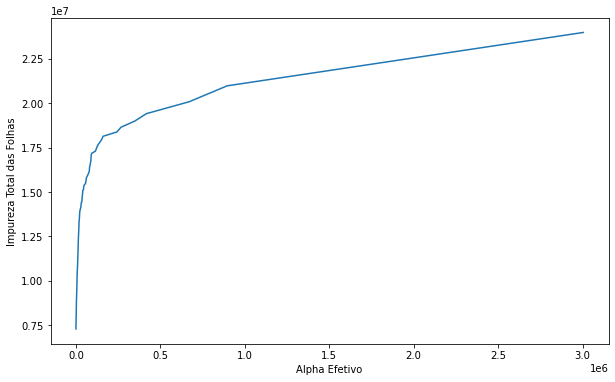

In [40]:
#Calcule o caminho indicado pelos CCP-alfas dessa árvore


path = regr_1.cost_complexity_pruning_path(x_train_arv,y_train_arv)
#path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha Efetivo")
plt.ylabel("Impureza Total das Folhas")

In [41]:
#treinando a arvore para os alphas obtidos
clfs= []
for ccp_alpha in ccp_alphas:
    clf= DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train_arv, y_train_arv)
    clfs.append(clf)

In [42]:
#preparando arquivo
y_test_arv= df_test_dummies_new['renda']
x_test_arv= df_test_dummies_new.copy()
x_test_arv.drop(columns=['renda'],inplace=True)

In [43]:
# calculando o MSE para cada arvore
train_scores = [mean_squared_error(y_train_arv, clf.predict(x_train_arv)) for clf in clfs]
test_scores = [mean_squared_error(y_test_arv, clf.predict(x_test_arv)) for clf in clfs]

<function matplotlib.pyplot.show(close=None, block=None)>

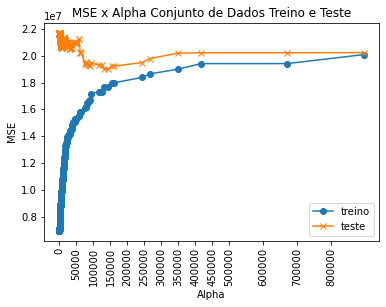

In [44]:
#montando o gráfico e escolhendo ponto próximo do mínimo 
fig, ax= plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x Alpha Conjunto de Dados Treino e Teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker = 'o', label = "treino")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker = 'x', label = "teste")
plt.xticks([0, 50000, 100000, 150000, 200000, 250000,300000,350000,400000, 450000, 500000, 600000, 700000, 800000], rotation=90)
ax.legend()

plt.show


In [45]:
#Calculando o R-quadrado dessa árvore encontrada no item acima
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=140000)
arvore_final.fit(x_train_arv,y_train_arv)
print(f"Profundidade:{arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de teste:{arvore_final.score(x_test_arv,y_test_arv):.2f}")
print(f"MSE na base de teste:{mean_squared_error(y_test_arv, arvore_final.predict(x_test_arv)):.2f}")


Profundidade:6
R-quadrado na base de teste:0.18
MSE na base de teste:18996557.24


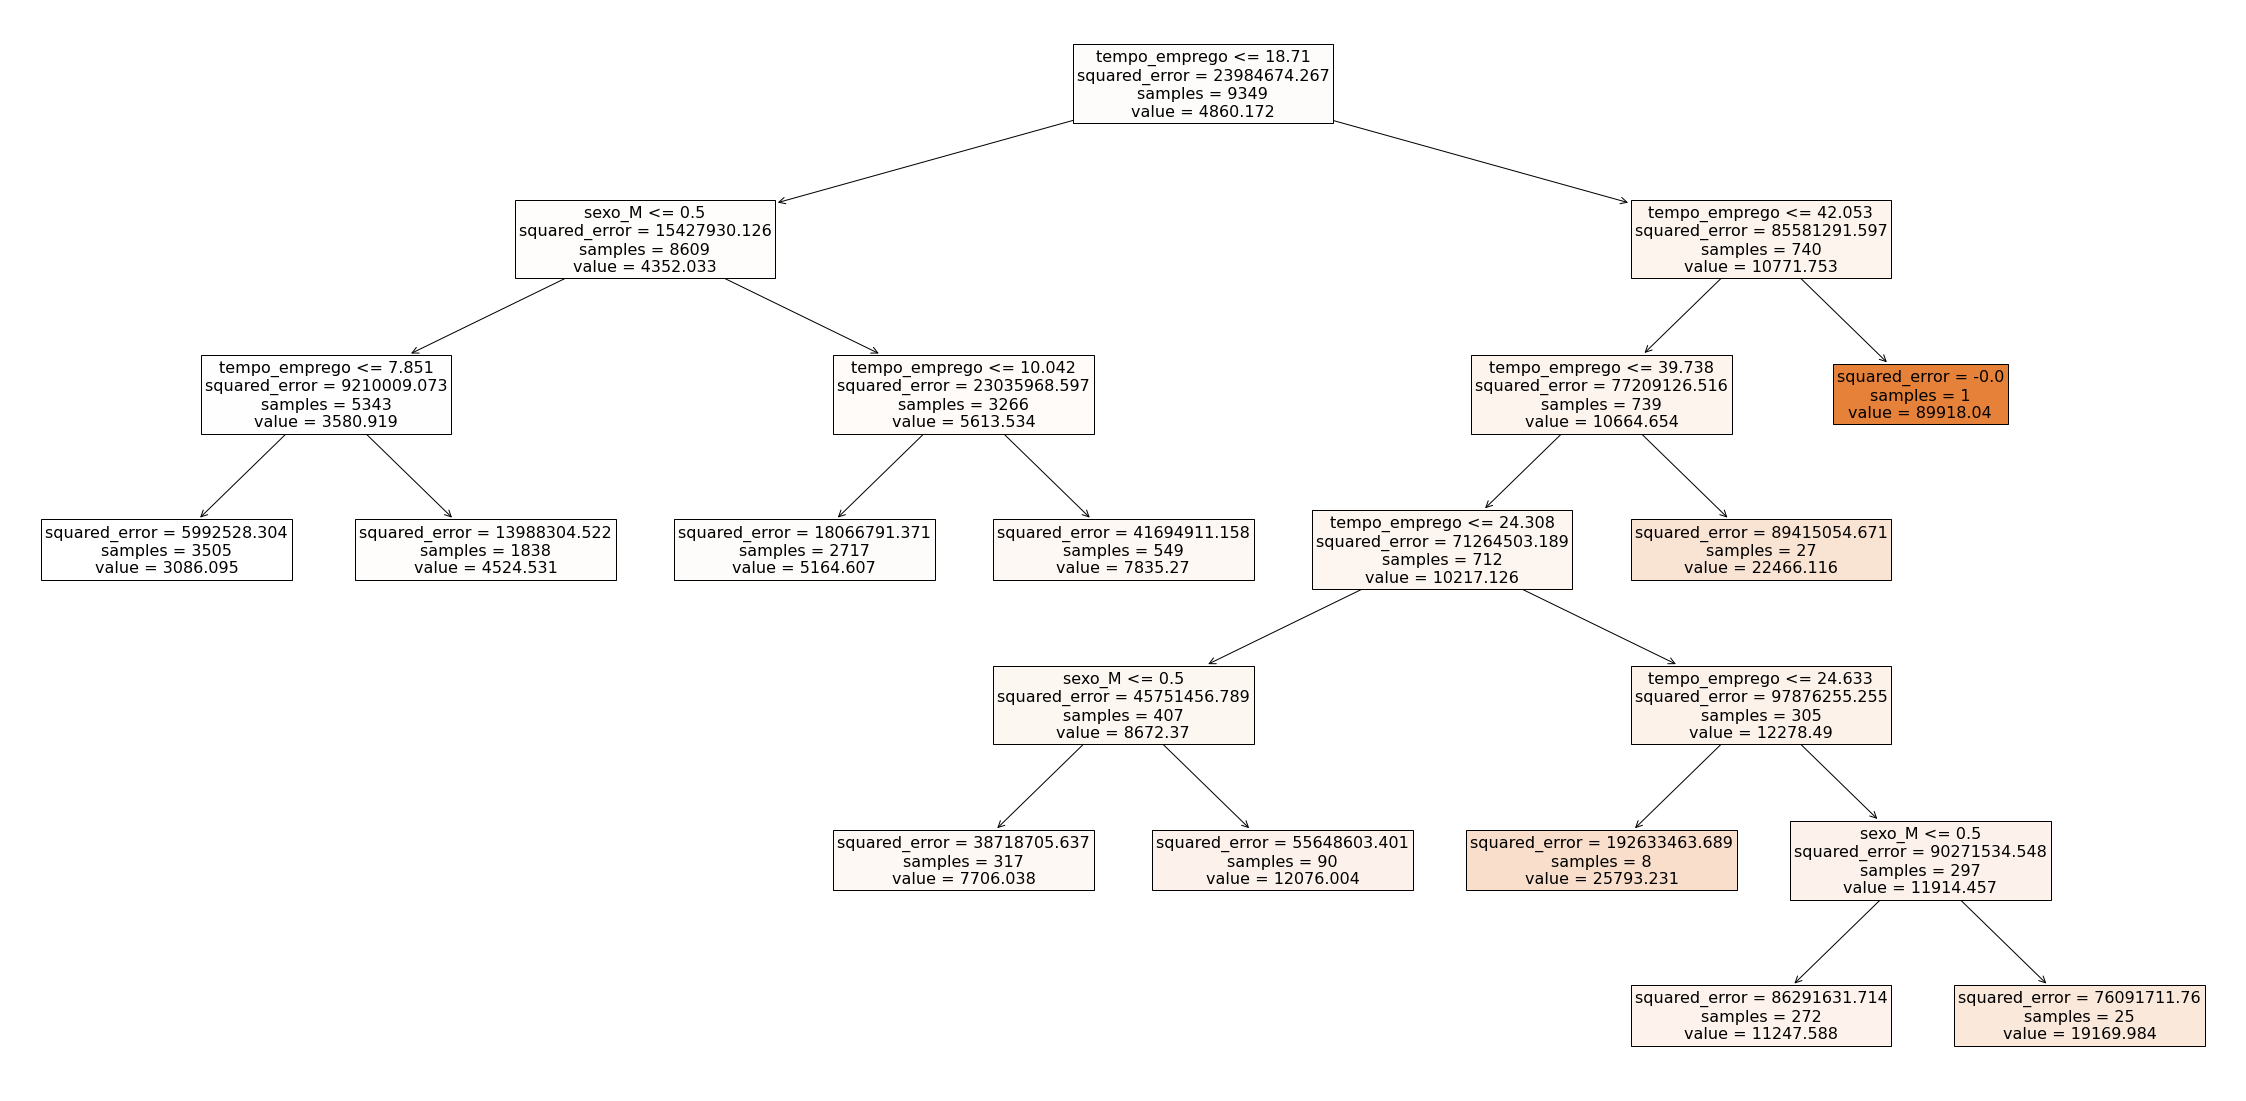

In [46]:
#Visualizando a arvore
plt.rc('figure',figsize=(40,20))
tp = tree.plot_tree(arvore_final,feature_names=x_train_arv.columns,filled=True, fontsize=16)

Ajustei a árvore mas consegui um R2 de 0.180 que é menor do que consegui com o modelo Stepwise.